In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [61]:
per36 = pd.read_csv("NBAper36.csv", encoding = "utf8")
advanced = pd.read_csv("NBAadvanced.csv", encoding = "utf8")
salaries = pd.read_csv("NBAsalaries.csv", encoding = "utf8")
per36_ = per36.drop_duplicates("Player", keep= "first")
salaries = pd.read_csv("NBAsalaries.csv", encoding = "utf8")
per36_.to_csv('NBAper36.CSV', index=True)
perbirth = pd.read_csv("per_birth_sal.csv", encoding = "utf8")
advbirth = pd.read_csv("adv_birth_sal.csv", encoding = "utf8")

In [62]:
age = advanced[["Player","Age"]]
agedf = pd.DataFrame(age)
agedf

,Player,Age
0,Steven Adams,26
1,Bam Adebayo,22
2,LaMarcus Aldridge,34
3,Nickeil Alexander-Walker,21
4,Grayson Allen,24
...,...,...
509,Thaddeus Young,31
510,Trae Young,21
511,Cody Zeller,27
512,Ante Žižić,23


In [63]:
salaries

,Player,2019-20
0,A.J. Hammons,350087
1,Aaron Gordon,19863636
2,Aaron Holiday,2239200
3,Abdel Nader,1618520
4,Admiral Schofield,898310
...,...,...
519,Zach Collins,4240200
520,Zach LaVine,19500000
521,Zach Norvell,50752
522,Zhaire Smith,3058800


In [64]:
combined = pd.merge(agedf, salaries, how = "inner", on = "Player")
combinedgb = combined.groupby(["Age"]).sum()
combinedgb

,2019-20
Age,
19,39427890
20,91883361
21,109380474
22,130184110
23,174960011
24,266193796
25,211040273
26,297086506
27,396495482


In [75]:
combinedgb1 = combined.groupby(["Age"]).mean()

,2019-20
Age,
19,35843.536364
20,35339.754231
21,32170.727647
22,26036.822000
23,44861.541282
24,55457.040833
25,62070.668529
26,66019.223556
27,104340.916316


In [65]:
print(combined["2019-20"].max())
print(combined["2019-20"].min())

40231758
50000


43
19


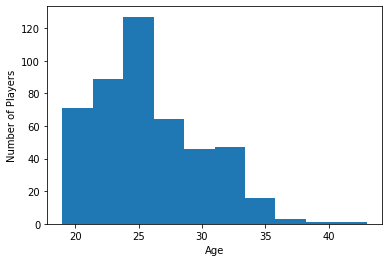

In [66]:
print(combined["Age"].max())
print(combined["Age"].min())

plt.hist(combined["Age"])
plt.xlabel("Age")
plt.ylabel("Number of Players")
plt.savefig("histogram.pdf")
plt.show()

In [67]:
bins = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 44]

ageranges = ["19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", "36", ">36"]

salaryage = pd.cut(agedf["Age"], bins, labels = ageranges)

salaryage.value_counts()

22     63
24     59
23     48
26     47
25     40
27     39
21     38
20     29
28     26
29     26
31     21
30     20
33     16
19     11
32     10
34     10
35      6
>36     4
36      1
Name: Age, dtype: int64

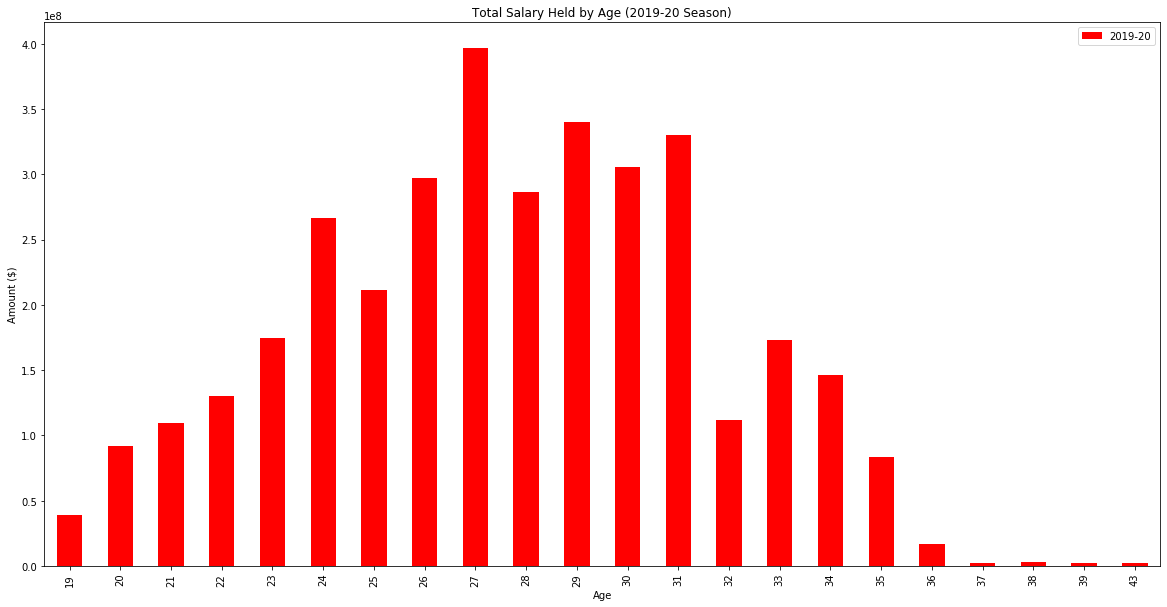

In [78]:
combinedsal = combinedgb.plot(kind = "bar", figsize = (20,10), color = "red")
plt.ylabel("Amount ($)")
plt.xlabel("Age")
plt.title("Total Salary Held by Age (2019-20 Season)")
plt.show()

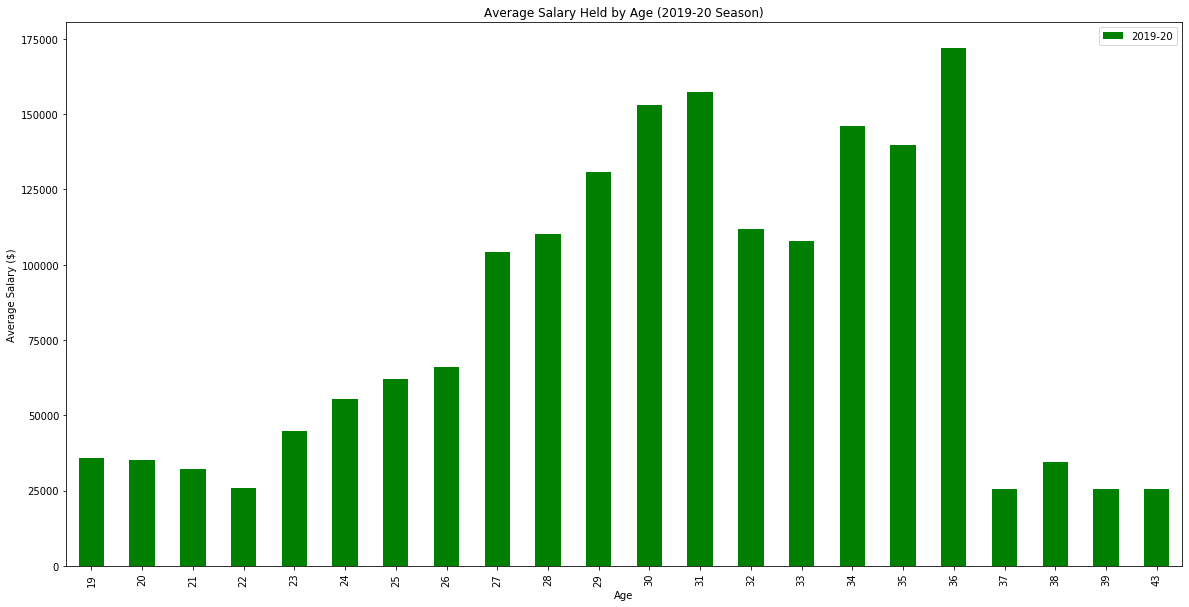

In [77]:
combinedsal = combinedgb1.plot(kind = "bar", figsize = (20,10), color = "green")
plt.ylabel("Average Salary ($)")
plt.xlabel("Age")
plt.title("Average Salary Held by Age (2019-20 Season)")
plt.show()

In [69]:
age = perbirth["Age"].value_counts()
age

26    34
23    30
22    28
24    26
27    23
28    20
21    19
25    18
29    17
20    17
31    14
30    14
33     9
34     7
32     7
19     6
35     2
39     1
36     1
37     1
38     1
43     1
Name: Age, dtype: int64

In [10]:
advbirth

,Player,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,City,State,2019-20
0,Bam Adebayo,22,MIA,65,2235,20.6,0.606,0.018,0.476,8.7,...,3.6,8.1,0.175,1.6,2.1,3.6,3.2,Newark,New Jersey,3454080
1,Grayson Allen,24,MEM,30,498,11.4,0.577,0.517,0.199,1.1,...,0.3,0.7,0.070,-1.0,-1.5,-2.6,-0.1,Jacksonville,Florida,2429400
2,Al-Farouq Aminu,29,ORL,18,380,7.6,0.395,0.419,0.337,6.6,...,0.5,0.1,0.016,-4.5,1.4,-3.1,-0.1,Atlanta,Georgia,9258000
3,Justin Anderson,26,BRK,3,17,-3.8,0.218,0.500,0.333,0.0,...,0.0,-0.1,-0.167,-12.8,-2.3,-15.1,-0.1,Montross,Virginia,98144
4,Kyle Anderson,26,MEM,59,1140,13.0,0.542,0.221,0.236,5.1,...,1.4,2.2,0.095,-1.3,1.9,0.6,0.7,Fairview,New Jersey,9073050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,D.J. Wilson,23,MIL,31,280,8.4,0.476,0.545,0.089,3.8,...,0.5,0.3,0.055,-3.9,0.3,-3.6,-0.1,Mount Shasta,California,2961120
292,Christian Wood,24,DET,62,1325,23.2,0.659,0.276,0.476,8.8,...,1.5,5.1,0.184,3.5,-0.3,3.1,1.7,Long Beach,California,1645357
293,Delon Wright,27,DAL,65,1412,16.1,0.563,0.307,0.236,5.0,...,1.8,4.3,0.148,0.4,2.0,2.4,1.6,Los Angeles,California,9473684
294,Thaddeus Young,31,CHI,64,1591,13.3,0.521,0.369,0.120,6.2,...,2.1,1.9,0.058,-1.4,0.2,-1.1,0.4,New Orleans,Louisiana,12900000
